In [17]:
import pandas as pd

# Define the file paths
file1_path = '/Users/mariiakokina/Documents/eo_database/chemical_composition/updated_matched_plants_10%.csv'
file2_path = '/Users/mariiakokina/Documents/eo_database/chemical_composition/plants_with_fingerprints_updated.csv'
file3_path = '/Users/mariiakokina/Documents/eo_database/chemical_composition/Salmonella.csv'

# Read the CSV files
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)
df3 = pd.read_csv(file3_path)

# Check if the 'Plant_Species' column is the first column and consistent across files
if df1.columns[0] != 'Plant_Species' or df2.columns[0] != 'Plant_Species' or df3.columns[0] != 'Plant_Species':
    raise ValueError("The first column in all files must be 'Plant_Species' and it must be consistent across all files.")

# Concatenate the DataFrames side by side
# Drop 'Plant_Species' from df2 and df3 but keep it in df1
result = pd.concat([df1, df2.drop('Plant_Species', axis=1), df3.drop('Plant_Species', axis=1)], axis=1)

# Save the concatenated DataFrame to a new CSV file
result.to_csv('concatenated_data.csv', index=False)  

# Calculate the starting index for each DataFrame's columns in the concatenated result
start_index_df2 = len(df1.columns)  # Start index for df2 columns in the concatenated DataFrame
start_index_df3 = start_index_df2 + len(df2.columns) - 1  # Start index for df3 columns, accounting for dropped 'Plant_Species'

# Print out the column index ranges for each file
print(f"Columns from {file1_path}: 0 to {len(df1.columns)-1}")
print(f"Columns from {file2_path}: {start_index_df2} to {start_index_df2 + len(df2.columns) - 2}")  # -2 accounts for dropped 'Plant_Species' and 0-indexing
print(f"Columns from {file3_path}: {start_index_df3} to {start_index_df3 + len(df3.columns) - 2}")  # Same adjustments as above


Columns from /Users/mariiakokina/Documents/eo_database/chemical_composition/updated_matched_plants_10%.csv: 0 to 130
Columns from /Users/mariiakokina/Documents/eo_database/chemical_composition/plants_with_fingerprints_updated.csv: 131 to 260
Columns from /Users/mariiakokina/Documents/eo_database/chemical_composition/Salmonella.csv: 261 to 262


In [18]:
import pandas as pd

# Define the path to the concatenated dataset
concatenated_data_path = 'concatenated_data.csv' 

# Read the concatenated dataset with header
df = pd.read_csv(concatenated_data_path)

# Get the name of the last column
last_column_name = df.columns[261]

# Access the value of the first cell in the last column
first_cell_value = df[last_column_name].iloc[0]

print("Value of the first cell in the last column ('{}'): {}".format(last_column_name, first_cell_value))


Value of the first cell in the last column ('Salmonella Typhimurium'): 0


In [21]:
import pandas as pd

# Define the path to the concatenated dataset
concatenated_data_path = 'concatenated_data.csv'

# Read the concatenated dataset with header
df = pd.read_csv(concatenated_data_path)

# Get the column names
column_names = df.columns.tolist()

# Find the index where 'Limonene_fingerprint' appears
fingerprint_start_index = column_names.index('Limonene_fingerprint')
fingerprint_end_index = fingerprint_start_index + 129  # 130 columns for fingerprints

# Find the index where 'Salmonella Typhimurium' appears
activity_column_name = 'Salmonella Typhimurium'  
activity_start_index = column_names.index(activity_column_name)

# Concentration data starts at index 1 ('Plant_Species' is at index 0)
concentration_start_index = 1
concentration_end_index = fingerprint_start_index - 1  # Just before the fingerprint data

# Print the results
print("Concentration Data: Columns {} to {}".format(concentration_start_index, concentration_end_index))
print("Fingerprint Data: Columns {} to {}".format(fingerprint_start_index, fingerprint_end_index))
print("Labeled Antimicrobial Activity Data: Column {}".format(activity_start_index))


Concentration Data: Columns 1 to 130
Fingerprint Data: Columns 131 to 260
Labeled Antimicrobial Activity Data: Column 261


In [22]:
import pandas as pd

# Define file path for the dataset
file_path = 'concatenated_data.csv'  

# Load dataset
data = pd.read_csv(file_path)

# Initialize a list to hold all reorganized data
all_reorganized_data = []

# Iterate over all plants (rows) in the dataset
for i in range(len(data)):
    # Extract the row for the current plant
    plant = data.iloc[i]

    # Define the range for chemical names, fingerprint data, and classification data
    chemical_names = data.columns[1:131]  # Chemical names columns
    fingerprint_data = plant[131:261]  # Fingerprints for the current plant
    classification_data_column = 'Salmonella Typhimurium' 

    # Extract the 'References' data for the current plant
    references_data = plant['Reference']  

    # Prepare lists for each column in the new DataFrame
    plant_species_list = [plant['Plant_Species']] * len(chemical_names)
    chemical_list = chemical_names.tolist()
    concentration_list = plant[1:131].tolist()  # Concentration data columns
    fingerprint_list = fingerprint_data.tolist()
    classification_list = [plant[classification_data_column]] * len(chemical_names)
    references_list = [references_data] * len(chemical_names)  # Replicate the references for each chemical

    # Ensure all lists have the same length
    min_length = min(len(plant_species_list), len(chemical_list), len(concentration_list), len(fingerprint_list), len(classification_list), len(references_list))
    
    plant_species_list = plant_species_list[:min_length]
    chemical_list = chemical_list[:min_length]
    concentration_list = concentration_list[:min_length]
    fingerprint_list = fingerprint_list[:min_length]
    classification_list = classification_list[:min_length]
    references_list = references_list[:min_length]

    # Check and print lengths for debugging
    print(f"Lengths for plant {i}:")
    print(f"  Plant species list: {len(plant_species_list)}")
    print(f"  Chemical list: {len(chemical_list)}")
    print(f"  Concentration list: {len(concentration_list)}")
    print(f"  Fingerprint list: {len(fingerprint_list)}")
    print(f"  Classification list: {len(classification_list)}")
    print(f"  References list: {len(references_list)}")

    # Prepare data for all columns in a dictionary
    data_dict = {
        'Plant_Species': plant_species_list,
        'Chemical': chemical_list,
        'Concentration': concentration_list,
        'Fingerprints': fingerprint_list,
        'Salmonella Typhimurium': classification_list,
        'Reference': references_list
    }

    # Construct the DataFrame from the dictionary
    reorganized_data = pd.DataFrame(data_dict)

    # Remove rows where the concentration is 0.0
    reorganized_data = reorganized_data.loc[reorganized_data['Concentration'] != 0.0]

    # Append the reorganized data for the current plant to the all_reorganized_data list
    all_reorganized_data.append(reorganized_data)

# Concatenate all reorganized data into a single DataFrame
all_reorganized_data = pd.concat(all_reorganized_data, ignore_index=True)

# Define the output file path
output_file_path = "reorganized_plants.csv"

# Save the reorganized data to a new CSV file
all_reorganized_data.to_csv(output_file_path, index=False)

print(f"Reorganized data for all plants with concentrations, fingerprints, and references saved to {output_file_path}")


Lengths for plant 0:
  Plant species list: 130
  Chemical list: 130
  Concentration list: 130
  Fingerprint list: 130
  Classification list: 130
  References list: 130
Lengths for plant 1:
  Plant species list: 130
  Chemical list: 130
  Concentration list: 130
  Fingerprint list: 130
  Classification list: 130
  References list: 130
Lengths for plant 2:
  Plant species list: 130
  Chemical list: 130
  Concentration list: 130
  Fingerprint list: 130
  Classification list: 130
  References list: 130
Lengths for plant 3:
  Plant species list: 130
  Chemical list: 130
  Concentration list: 130
  Fingerprint list: 130
  Classification list: 130
  References list: 130
Lengths for plant 4:
  Plant species list: 130
  Chemical list: 130
  Concentration list: 130
  Fingerprint list: 130
  Classification list: 130
  References list: 130
Lengths for plant 5:
  Plant species list: 130
  Chemical list: 130
  Concentration list: 130
  Fingerprint list: 130
  Classification list: 130
  References li

In [36]:
import pandas as pd
import re  # Import regular expressions library

# Function to extract the core chemical name (excluding parentheses)
def extract_core_name(text):
    return re.sub(r'\s*\([^)]*\)', '', text).strip().lower()

# Define file paths for the datasets
data_path = 'reorganized_plants.csv'
chemicals_path = '/Users/mariiakokina/Documents/eo_database/initial_data/matched_chemicals_final_manual.csv'

# Load the datasets
data = pd.read_csv(data_path)
chemicals = pd.read_csv(chemicals_path)

# Apply the function to clean chemical names in both datasets if needed
# You might need to adjust the column names based on your actual data
data['Chemical'] = data['Chemical'].apply(extract_core_name)
chemicals['Chemical Name'] = chemicals['Chemical Name'].apply(extract_core_name)

# Initialize a list to hold merged data for all plants
all_merged_data = []

# Iterate over each plant in the data
for index, plant in data.groupby('Plant_Species'):
    # Merge the plant data with the chemicals on the chemical names
    merged_data = pd.merge(plant, chemicals[['Chemical Name', 'SMILES']], left_on='Chemical', right_on='Chemical Name', how='left')
    
    # Drop the 'Chemical Name' column from the merged data
    merged_data.drop(columns=['Chemical Name'], inplace=True)
    
    # Reorder columns so that SMILES is right next to Chemical
    cols = merged_data.columns.tolist()
    smiles_index = cols.index('SMILES')  # Find the index of 'SMILES'
    # Reorder columns to place 'SMILES' next to 'Chemical'
    cols = [cols[0]] + ['SMILES'] + cols[1:smiles_index] + cols[smiles_index+1:]
    merged_data = merged_data[cols]
    
    # Append the merged data for the current plant to the all_merged_data list
    all_merged_data.append(merged_data)

# Concatenate all merged data into a single DataFrame
all_merged_data = pd.concat(all_merged_data, ignore_index=True)

# Define the output file path for the updated dataset
output_file_path = 'reorganized_plants_smiles.csv'

# Save the updated data to a new CSV file
all_merged_data.to_csv(output_file_path, index=False)

print(f"Updated data for all plants with expanded fingerprints and SMILES saved to {output_file_path}")


Updated data for all plants with expanded fingerprints and SMILES saved to reorganized_plants_smiles.csv


In [37]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

# Function to decode Morgan fingerprint into human-readable information
def decode_morgan_fingerprint(mol, fp_bits):
    info = {}
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=len(fp_bits), bitInfo=info)
    bit_interpretations = {}
    for bit in range(len(fp_bits)):
        if fp_bits[bit]:  # Only consider bits that are set
            atom_info = []
            if bit in info:  # If bit information is available
                for atom_idx, radius in info[bit]:
                    atom = mol.GetAtomWithIdx(atom_idx)
                    env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom_idx)
                    submol = Chem.PathToSubmol(mol, env)
                    atom_info.append((atom_idx, atom.GetSymbol(), radius, Chem.MolToSmiles(submol)))
            bit_interpretations[bit] = atom_info
    return bit_interpretations

# Load the dataset
data_path = 'reorganized_plants_smiles.csv'
data = pd.read_csv(data_path)

# Prepare a new DataFrame to collect all new data
expanded_data = []

# Iterate through each molecule in the dataset
for index, row in data.iterrows():
    # Convert the SMILES string to an RDKit molecule object
    mol = Chem.MolFromSmiles(row['SMILES'])
    
    # Convert the fingerprint string from the dataset to a list of bits (integers)
    fingerprint_bits = [int(bit) for bit in row['Fingerprints']]
    
    # Decode the fingerprint into human-readable form
    bit_interpretations = decode_morgan_fingerprint(mol, fingerprint_bits)
    
    # Prepare new row data with bit interpretations and expanded fingerprints
    new_row_data = {'BitInterpretations': str(bit_interpretations)}
    new_row_data.update({f'Bit_{bit_index}': bit_value for bit_index, bit_value in enumerate(fingerprint_bits)})
    
    # Append the new data for this row to the expanded_data list
    expanded_data.append(new_row_data)

# Convert expanded data into a DataFrame
expanded_df = pd.DataFrame(expanded_data)

# Find the index of the 'Concentration' column
concentration_index = data.columns.get_loc("Concentration") + 1  # +1 to place columns after

# Concatenate the new columns to the original dataframe at the specific position
data = pd.concat([data.iloc[:, :concentration_index], expanded_df, data.iloc[:, concentration_index:]], axis=1)

# Arrange columns: Move 'Fingerprints' and 'Bit_Interpretations' to the end
cols = list(data.columns)
for col in ['Fingerprints', 'BitInterpretations']:
    cols.append(cols.pop(cols.index(col)))  # Move column to the end

data = data[cols]

# Define the output file path for the updated dataset with interpretations and expanded fingerprints
output_file_path = 'reorganized_plants_expanded_fingerprints.csv'

# Save the updated data to a new CSV file
data.to_csv(output_file_path, index=False)

print(f"Updated data with bit interpretations and expanded fingerprints saved to {output_file_path}")


Updated data with bit interpretations and expanded fingerprints saved to reorganized_plants_expanded_fingerprints.csv


In [38]:
import pandas as pd

# Load the dataset
data_path = 'reorganized_plants_expanded_fingerprints.csv'
data = pd.read_csv(data_path)

# Get all column names from the dataset
all_column_names = data.columns

# Determine the index range of all columns, excluding the first four and last four columns
total_columns = len(all_column_names)
range_after_excluding_ends = (4, total_columns - 4)  # Indexing starts at 0, so 4 represents the 5th column

# Print the index range excluding the first four and last four columns
print(f"Index range excluding the first four and last four columns: {range_after_excluding_ends}")

# Optionally, if you want to see the names of these columns:
excluded_first_four = all_column_names[4]  # Name of the 5th column
excluded_last_four = all_column_names[-5]  # Name of the fifth-last column

print(f"The 5th column in the dataset is: {excluded_first_four}")
print(f"The fifth-last column in the dataset is: {excluded_last_four}")


Index range excluding the first four and last four columns: (4, 2052)
The 5th column in the dataset is: Bit_0
The fifth-last column in the dataset is: Bit_2047


In [39]:
import pandas as pd

# Load your data, ensuring that NA values are read correctly
data = pd.read_csv('reorganized_plants_expanded_fingerprints.csv', keep_default_na=False)

# Separate 'Bit_' columns from the rest of the data
bit_columns = [col for col in data.columns if col.startswith('Bit_')]
non_bit_columns = [col for col in data.columns if not col.startswith('Bit_')]

# Creating a boolean mask for 'Bit_' columns where not all values are 0
mask = (data[bit_columns] != 0).any(axis=0)

# Apply the mask to filter 'Bit_' columns using column names
filtered_bit_columns = data.loc[:, mask.index[mask]]

# Recombine the filtered 'Bit_' columns with the rest of the data
final_data = pd.concat([data[non_bit_columns], filtered_bit_columns], axis=1)

# Calculate the number of dropped columns
original_bit_columns = len(bit_columns)
filtered_bit_columns_num = filtered_bit_columns.shape[1]
num_dropped_columns = original_bit_columns - filtered_bit_columns_num

# Output the results
print(final_data.shape)
print(f"Number of dropped 'Bit_' columns: {num_dropped_columns}")

# Save the complete dataset with filtered 'Bit_' columns back to a new CSV file, ensuring NA values are not altered
save_path = 'reorganized_plants_filtered.csv'
final_data.to_csv(save_path, index=False, na_rep='NA')

# Return the path where the file was saved for user access
save_path


(408, 690)
Number of dropped 'Bit_' columns: 1366


'reorganized_plants_filtered.csv'

**I will now aggregate all chemicals into one row to reduce the duplicates of the plants

In [40]:
import pandas as pd

# Load the filtered dataset 
file_path = 'reorganized_plants_filtered.csv'  

data = pd.read_csv(file_path)

# Convert 'Reference' to string and handle NaNs
data['Reference'] = data['Reference'].fillna('No Reference').astype(str)

# Define the columns to aggregate
plant_species = 'Plant_Species'
salmonella_col = 'Salmonella Typhimurium' 
reference_col = 'Reference'  
bit_columns = [col for col in data.columns if col.startswith('Bit_')]
bit_interpretation_col = 'BitInterpretations'  

# Aggregate 'Reference' and 'BitInterpretations' by concatenating unique values
def unique_concatenate(series):
    return '; '.join(set(series))  # This separates each reference with a semicolon

references_aggregated = data.groupby(plant_species)[reference_col].agg(unique_concatenate)
interpretations_aggregated = data.groupby(plant_species)[bit_interpretation_col].agg(unique_concatenate)

# Group by 'Plant_Species' and aggregate binary features and salmonella  using max
columns_to_aggregate = [salmonella_col] + bit_columns  #salmonella is first in the list
binary_and_salmonella_aggregated = data.groupby(plant_species)[columns_to_aggregate].max()

# Combine the aggregated binary features, salmonella, and Reference into one DataFrame
aggregated_data = pd.concat([binary_and_salmonella_aggregated, references_aggregated, interpretations_aggregated], axis=1)

# Reset index to turn 'Plant_Species' back into a column
aggregated_data.reset_index(inplace=True)

# Ensuring 'BitInterpretations' is indeed part of the aggregated DataFrame
print("Columns in the aggregated DataFrame before reordering:", aggregated_data.columns)

# Reorder the columns
final_columns = [plant_species, salmonella_col, reference_col] + bit_columns + [bit_interpretation_col]
try:
    aggregated_data = aggregated_data[final_columns]
except KeyError as e:
    print("Error in reordering columns:", e)
    print("Please ensure all column names in 'final_columns' are present in 'aggregated_data'")

# Save the aggregated dataset
new_file_path = 'aggregated_plants.csv'  # Update this to where you want the file saved
aggregated_data.to_csv(new_file_path, index=False)

print(f"Aggregated dataset saved to {new_file_path}")


Columns in the aggregated DataFrame before reordering: Index(['Plant_Species', 'Salmonella Typhimurium', 'Bit_1', 'Bit_2', 'Bit_4',
       'Bit_8', 'Bit_9', 'Bit_11', 'Bit_12', 'Bit_13',
       ...
       'Bit_2025', 'Bit_2026', 'Bit_2027', 'Bit_2029', 'Bit_2033', 'Bit_2040',
       'Bit_2041', 'Bit_2044', 'Reference', 'BitInterpretations'],
      dtype='object', length=686)
Aggregated dataset saved to aggregated_plants.csv


/var/folders/x1/3wgmd54s6b7f7xc3rq_f0tdw0000gn/T/ipykernel_31347/2202661368.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=active_distribution.index, y=active_distribution.values, palette='coolwarm', dodge=False, linewidth=0.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


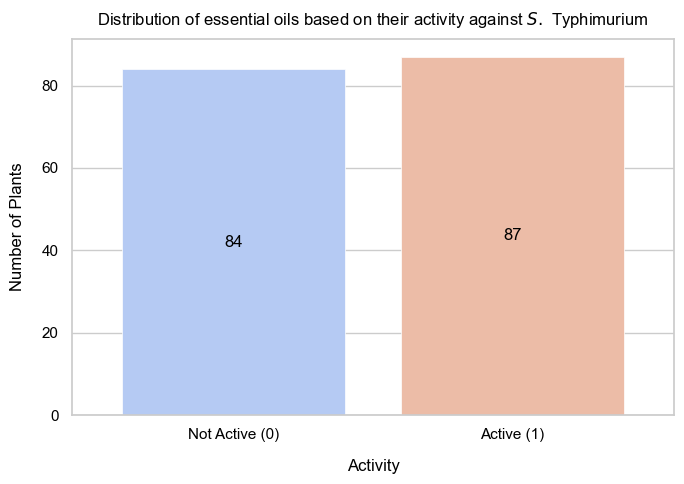

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style for aesthetics
sns.set(style="whitegrid")

# Loading the CSV file
df = pd.read_csv('aggregated_plants.csv')

# Distribution of activity against Salmonella Typhimurium
active_distribution = df['Salmonella Typhimurium'].value_counts()

# Plotting with a smaller figure size
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=active_distribution.index, y=active_distribution.values, palette='coolwarm', dodge=False, linewidth=0.5)
ax.legend().set_visible(False)  # Remove legend if not desired

# Customizing the plot
plt.title('Distribution of essential oils based on their activity against $\it{S.\ }$Typhimurium', fontsize=12, pad=10, color='black')
plt.xlabel('Activity', fontsize=12, labelpad=12, color='black')
plt.ylabel('Number of Plants', fontsize=12, labelpad=12, color='black')
plt.xticks(ticks=[0, 1], labels=['Not Active (0)', 'Active (1)'], color='black')
plt.yticks(color='black')

# Adjusting the margins around the bars to prevent them from being too close to the edge
plt.margins(x=0.1)

# Annotating bars with exact counts, ensuring text color is black and adjusting font size
for p in ax.patches:
    height = p.get_height()
    # Positioning the annotation at half the height of the bar for centering
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height/2),
                ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()

# Save the figure at 300 DPI with increased padding
plt.savefig('charts/activity_distribution_against_salmonella_typhimurium.png', dpi=300, bbox_inches='tight')

plt.show()





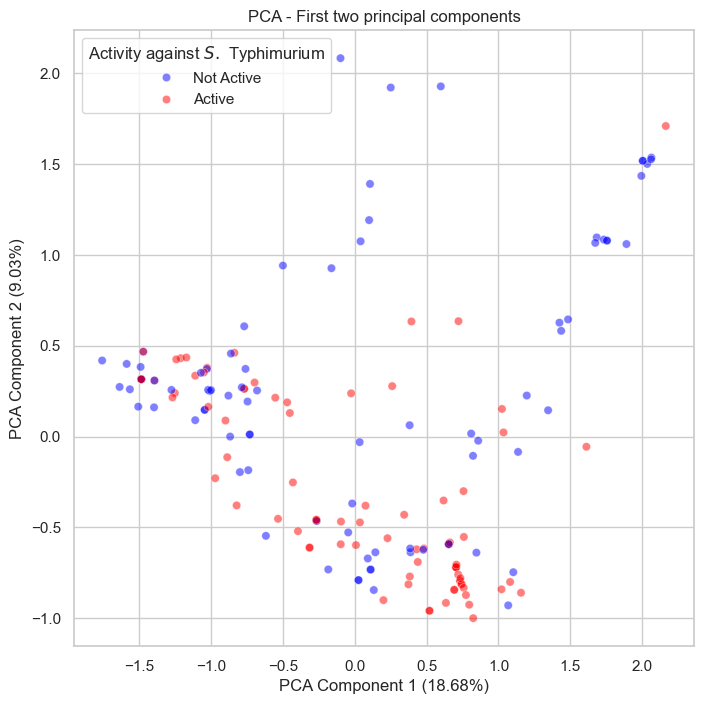

In [55]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the CSV file
df = pd.read_csv('aggregated_plants.csv')

# Define feature columns (assuming fingerprint columns are from 131 to 260)
feature_columns = df.columns[131:261]  # Adjust based on your actual columns for fingerprints

# Check if there are any missing values in the feature columns and handle them if necessary
if df[feature_columns].isnull().values.any():
    print("There are missing values in the feature columns. Please handle them before proceeding.")
    # Example handling: fill missing values with 0
    df[feature_columns] = df[feature_columns].fillna(0)

# Use PCA to reduce the data to two components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df[feature_columns])

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_percentage = explained_variance_ratio * 100

# Create a scatter plot of the two PCA components
plt.figure(figsize=(8, 8))

# Mapping binary values to 'Active' and 'Not Active'
activity_labels = df['Salmonella Typhimurium'].map({1: 'Active', 0: 'Not Active'})

# Plotting
scatter = sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1],
                          hue=activity_labels,
                          palette={'Active': 'red', 'Not Active': 'blue'},
                          alpha=0.5)

# Setting custom legend and labels
plt.title('PCA - First two principal components')
plt.xlabel(f'PCA Component 1 ({explained_variance_percentage[0]:.2f}%)')
plt.ylabel(f'PCA Component 2 ({explained_variance_percentage[1]:.2f}%)')
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ['Not Active', 'Active'], title="Activity against $\it{S.\ }$Typhimurium")

# Save the figure
plt.savefig('charts/pca_activity.png', dpi=300, bbox_inches='tight')
plt.show()
